## Lab-cleaning-categorical-data

In [1]:
# Import the necessary libraries if you are starting a new notebook

import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
# Load the continuous and discrete variables into continuous_df and discrete_df variables
continious_df = pd.read_csv('../lab-cleaning-categorical-data/files_for_lab/Data_Continious.csv') 
discrete_df=pd.read_csv('../lab-cleaning-categorical-data/files_for_lab/Data_Discrete.csv')
data_cat= pd.read_csv('../lab-cleaning-categorical-data/files_for_lab/Data_Categorical.csv')

In [ ]:
# Plot a correlation matrix, what can you see?
data.corr()

In [ ]:
# Create a function to plot every discrete variables. 
# Do the same with continuous variables                                                                
# (be careful, you may change the plot type to another one better suited for continuous data).

for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()

In [4]:
def plot_variable_dis(data):
    for column in data.columns:
        sns.displot(data[column])
        plt.show()

def plot_variable_con(data):
    for column in data.columns:
        sns.distplot(data[column])
        plt.show()


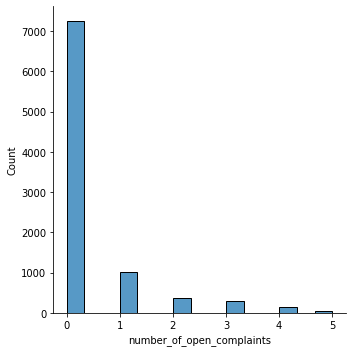

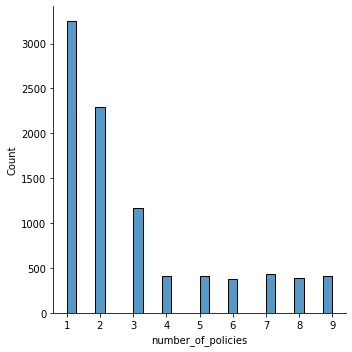

In [5]:
plot_variable_dis(discrete_df)

In [ ]:
# almost no open complaints
# policies 1,2 and 3 are the most high, while the rest was similar low

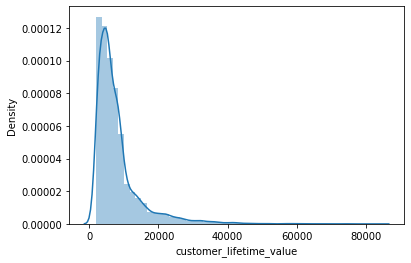

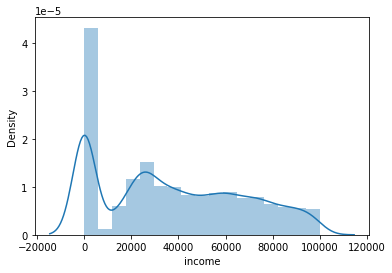

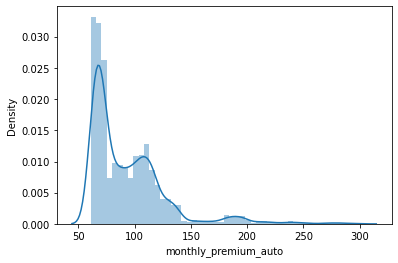

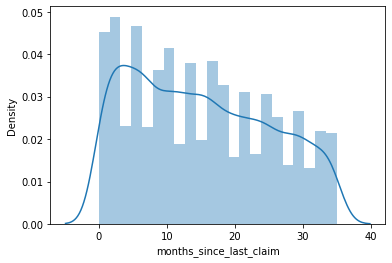

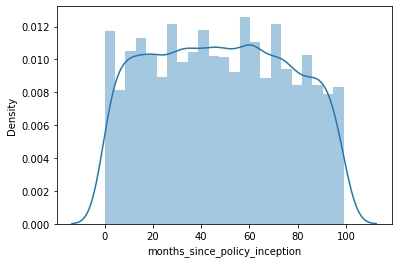

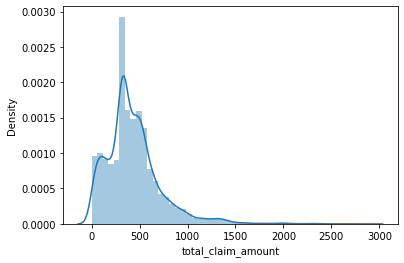

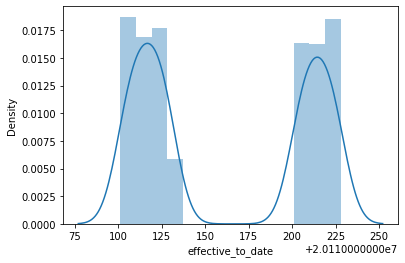

In [6]:
plot_variable_con(continious_df)

In [7]:
# Look for outliers in the continuous variables we have found 
# Hint: There was a good plot to do that

def box_plot(data):
    for col in data.columns:
        sns.boxplot(x=data[col], whis=10) 
        plt.show()

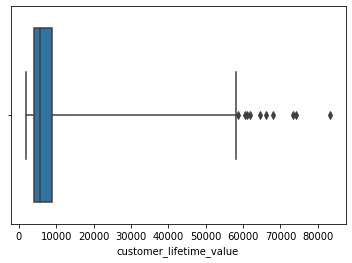

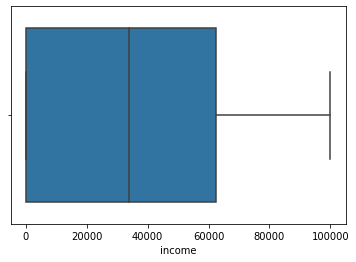

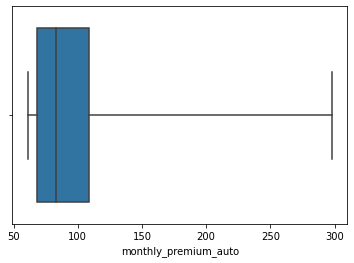

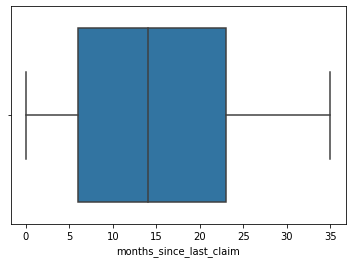

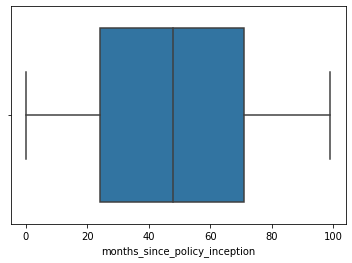

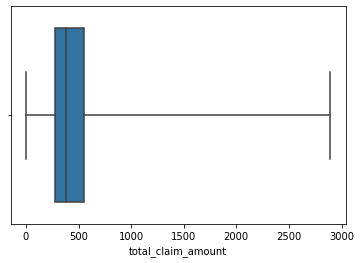

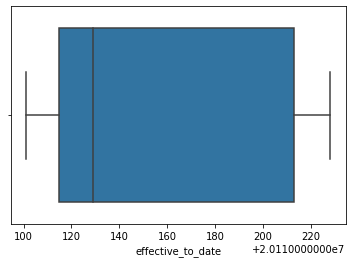

In [8]:
box_plot(continious_df)
# Have you found outliers? If you have, what should we do with them?
# There are outliners in the col. 'costumer_lifetime_value', that need to be removed

In [9]:

iqr = np.percentile(continious_df['customer_lifetime_value'],75) - np.percentile(continious_df['customer_lifetime_value'],25) 

iqr

4967.915247000001

In [10]:
upper_limit = np.percentile(continious_df['customer_lifetime_value'],75) + 10*iqr
lower_limit = np.percentile(continious_df['customer_lifetime_value'],25) - 10*iqr
upper_limit, lower_limit

(58641.31951125001, -45684.90067575001)

In [11]:
continious_df = continious_df[(continious_df['customer_lifetime_value']>lower_limit) & 
                              (continious_df['customer_lifetime_value']<upper_limit)]
continious_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,effective_to_date
0,2763.519279,56274,69,32,5,384.811147,20110224
1,6979.535903,0,94,13,42,1131.464935,20110131
2,12887.431650,48767,108,18,38,566.472247,20110219
3,7645.861827,0,106,18,65,529.881344,20110120
4,2813.692575,43836,73,12,44,138.130879,20110203
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764,20110210
9130,3096.511217,21604,79,14,28,379.200000,20110212
9131,8163.890428,0,85,9,37,790.784983,20110206
9132,7524.442436,21941,96,34,3,691.200000,20110203
